In [2]:
## simple Random Forest tutorial from datacamp


In [1]:
# Data Processing
import pandas as pd
import numpy as np

In [2]:
# Modeling 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [3]:
# Tree Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [4]:
bank_data = pd.read_csv("RFdata/bank-additional/bank-additional-full.csv", sep=";")

In [5]:
print(bank_data)
bank_data.dtypes

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
bank_data['job']=bank_data['job'].str.replace('.', '')

In [7]:
bank_data['default'] = bank_data['default'].map({'no':0, 'yes':1, 'unknown':0})
bank_data['y']=bank_data['y'].map({'no':0, 'yes':1})
bank_data = bank_data[['age', 'cons.conf.idx','cons.price.idx','y']]

In [8]:
bank_data.dtypes

age                 int64
cons.conf.idx     float64
cons.price.idx    float64
y                   int64
dtype: object

In [9]:
#split the data into features (X) and (y)
X = bank_data.drop ('y', axis =1)
y = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [10]:
type(X_train.age)

pandas.core.series.Series

In [11]:
print(y_train)

15207    0
15293    0
16167    0
32181    0
2575     0
        ..
37835    0
36922    0
16913    0
3214     0
24192    0
Name: y, Length: 32950, dtype: int64


In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_pred=rf.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8896576839038601


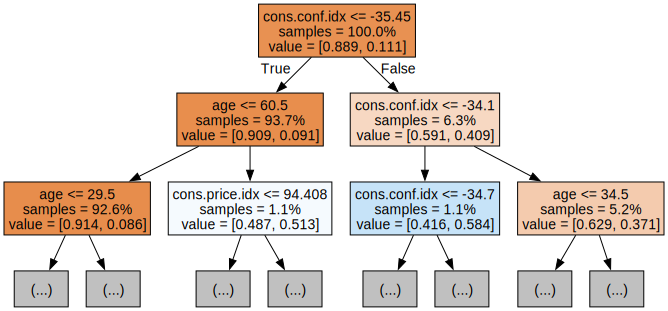

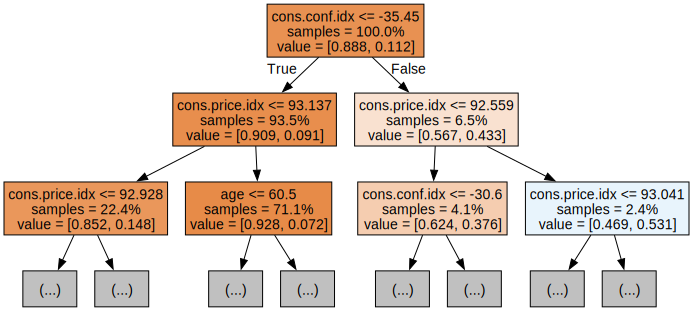

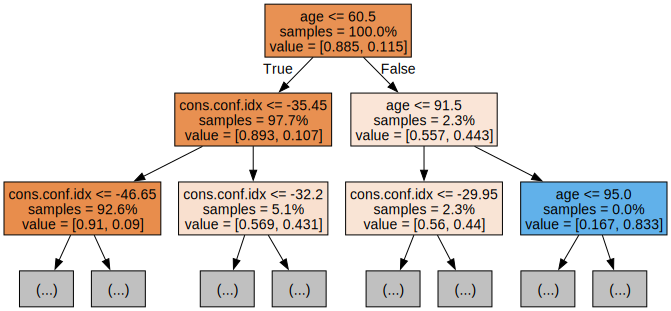

In [15]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree, 
                                feature_names=X_train.columns,
                                filled=True,
                                max_depth=2,
                                impurity=False,
                                proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)

In [76]:
print ("hello world")

hello world
